This case study is based on the very famous dataset in machine learning. The titanic survival data.

The data contains information about 891 passengers. It also indicates whether the passenger survived the titanic crash or not?

The goal is to create a predictive model which can predict the survival of a given person, if they were to board the titanic and the ship sinks... again! :(

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios. You can use this flow as a template to solve any supervised ML classification problem.

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

I know its a long list!! Take a deep breath... and let us get started!

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "TitanicSurvivalData.csv". This file contains 891 passenger details.

The goal is to learn from this data and predict if a new person boards the titanic ship and it sinks again... will he/she survive it or not?

## Data description
The business meaning of each column in the data is as below

* <b>PassengerId</b>: The id for each passenger
* <b>Survived</b>: Whether the passenger survived or not? 1=Survived, 0=Died
* <b>Pclass</b>: The travel class of the passenger
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: The genger of the passenger
* <b>Age</b>: The Age of the passenger
* <b>SibSp</b>: Number of Siblings/Spouses Aboard
* <b>Parch</b>: Number of Parents/Children Aboard
* <b>Ticket</b>: The ticket number of the passenger
* <b>Fare</b>: The amount of fare paid by the passenger
* <b>Cabin</b>: The cabin number allotted
* <b>Embarked</b>: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
TitanicSurvivalData=pd.read_csv('C:\\Users\\mchil\\Downloads\\Python batch\\Python Pred Modeling All notebooks + Datasets\\Python Datasets\\Classification Datasets\\TitanicSurvivalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', TitanicSurvivalData.shape)

# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print('Shape After deleting duplicate values:', TitanicSurvivalData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
TitanicSurvivalData.head(10)

Shape before deleting duplicate values: (891, 12)
Shape After deleting duplicate values: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Defining the problem statement: 
#### Create a Predictive model which can tell if a person will survive the titanic crash or not?
* Target Variable: Survived
* Predictors: age, sex, passenger class etc.


* Survived=0 The passenger died
* Survived=1 The passenger survived

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='Survived'>

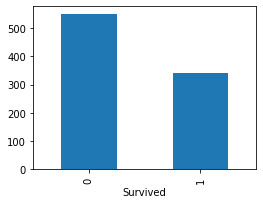

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=TitanicSurvivalData.groupby('Survived').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the survival of the passenger?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
TitanicSurvivalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
# Looking at the descriptive statistics of the data
TitanicSurvivalData.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
TitanicSurvivalData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>PassengerId</b>: Qualitative. Rejected.
* <b>Survived</b>: Categorical. Selected. This is the <b>Target Variable!</b>
* <b>Pclass</b>: Categorical. Selected.
* <b>Name</b>: Qualitative. Rejected. Your name does not save you from dying!!
* <b>Sex</b>: Categorical. Selected.
* <b>Age</b>: Continuous. Selected.
* <b>SibSp</b>: Categorical. Selected.
* <b>Parch</b>: Categorical. Selected.
* <b>Ticket</b>: Qualitative. Rejected.
* <b>Fare</b>: Continuous. Selected.
* <b>Cabin</b>: Qualitative. Rejected. Also, this has too many missing values!
* <b>Embarked</b>: Categorical. Selected.

# Removing useless columns from the data

In [8]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PassengerId','Name','Ticket','Cabin']
TitanicSurvivalData = TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 
'Pclass', 'Sex', 'SibSp','Parch','Embarked'

We use bar charts to see how the data is distributed for these categorical columns.

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

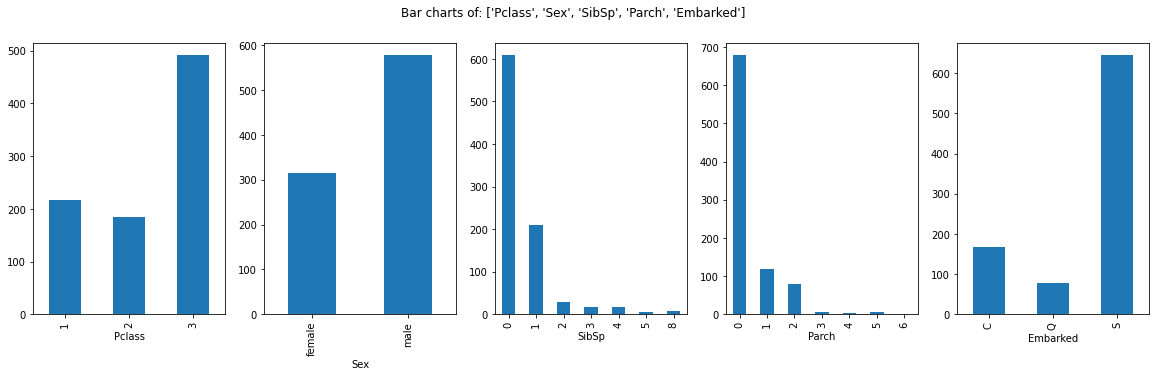

In [10]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp','Parch','Embarked'])

### Treating Imbalance in Categorical Variables

In [11]:
TitanicSurvivalData['SibSp'][TitanicSurvivalData['SibSp']>=2]=2 # For SibSp

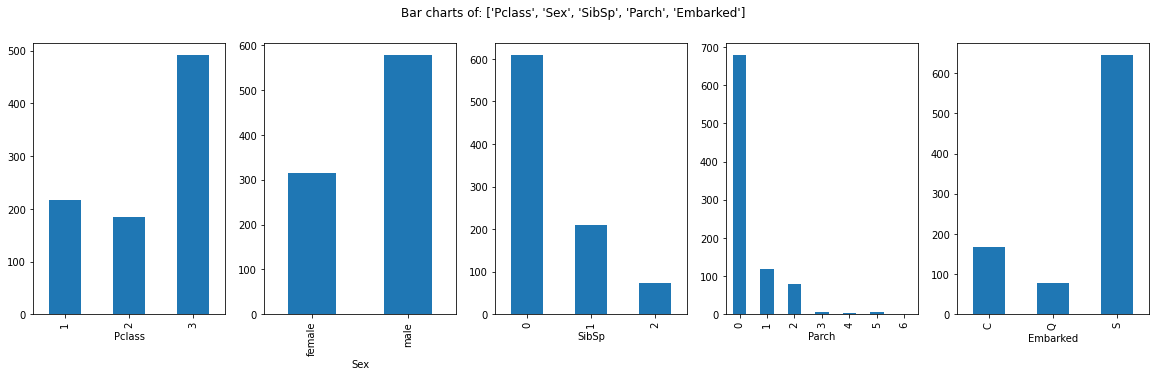

In [12]:
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp','Parch','Embarked'])

In [13]:
# For Parch
TitanicSurvivalData['Parch'][TitanicSurvivalData['Parch']>=3]=3

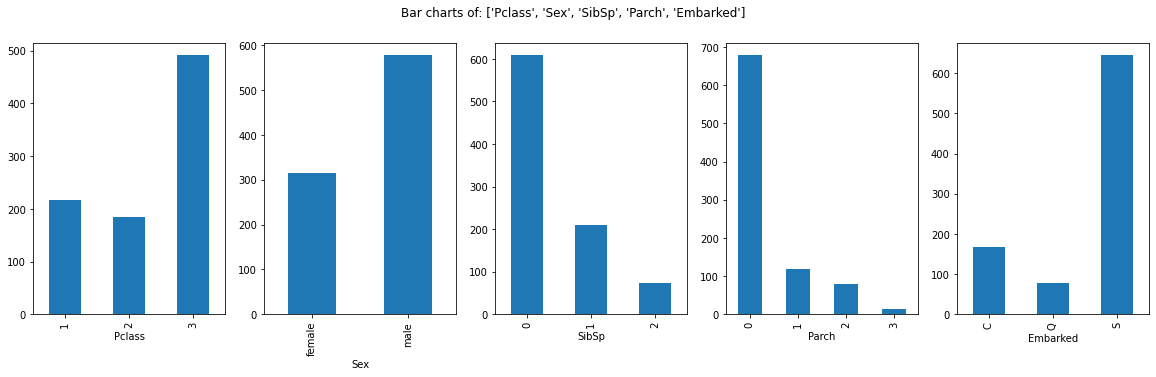

In [14]:
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp','Parch','Embarked'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'Pclass', 'Sex', 'SibSp','Parch','Embarked'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'Age',and 'Fare'

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

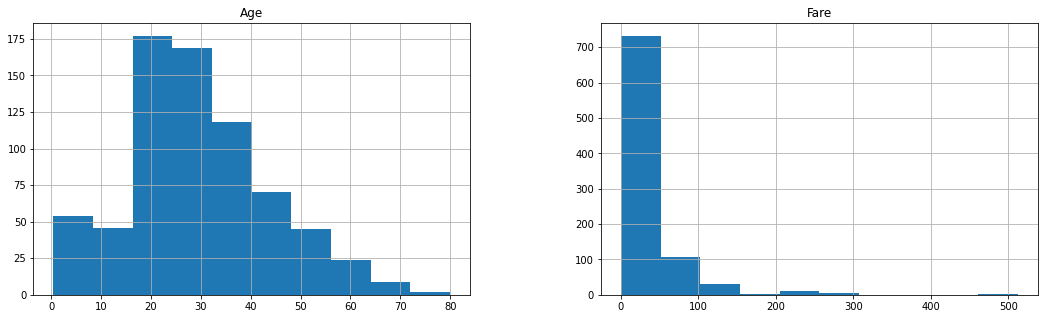

In [15]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
TitanicSurvivalData.hist(['Age', 'Fare'], figsize=(18,5))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 175 rows in data that has a age between 20 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Age</b> : Selected. The distribution is good.
* <b>Fare</b>: Selected. Outliers seen beyond 300, need to treat them.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers for 'Fare'

In [16]:
# Finding nearest values to 300 mark
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']<300].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
633      0.000
413      0.000
822      0.000
732      0.000
674      0.000
Name: Fare, Length: 888, dtype: float64

Above result shows the nearest logical value is 263.0, hence, replacing any value above 300 with it.

In [17]:
# Replacing outliers with nearest possibe value
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300] = 263.0

# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

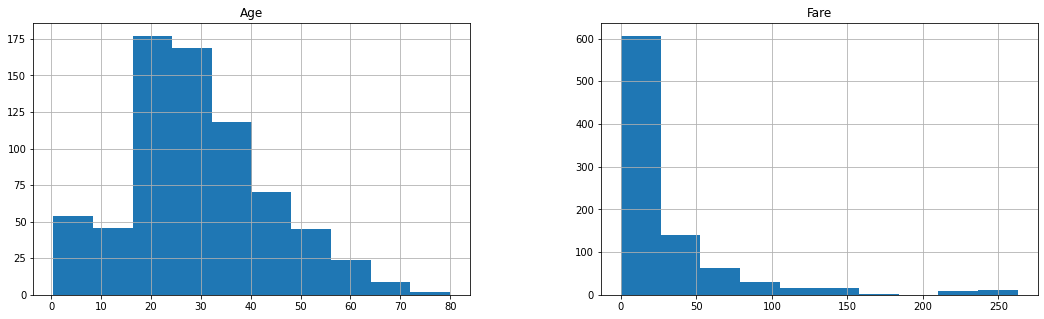

In [18]:
TitanicSurvivalData.hist(['Age','Fare'], figsize=(18,5))

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [19]:
# Finding how many missing values are there for each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

I am using Median and Mode value for the missing value replacement

In [20]:
# Replacing missing values of Age with median value
TitanicSurvivalData['Age'].fillna(TitanicSurvivalData['Age'].median(), inplace=True)

# Replacing missing values of Embarked with Mode value
TitanicSurvivalData['Embarked'].fillna(TitanicSurvivalData['Embarked'].mode()[0], inplace=True)

In [21]:
# Checking missing values again after the treatment
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

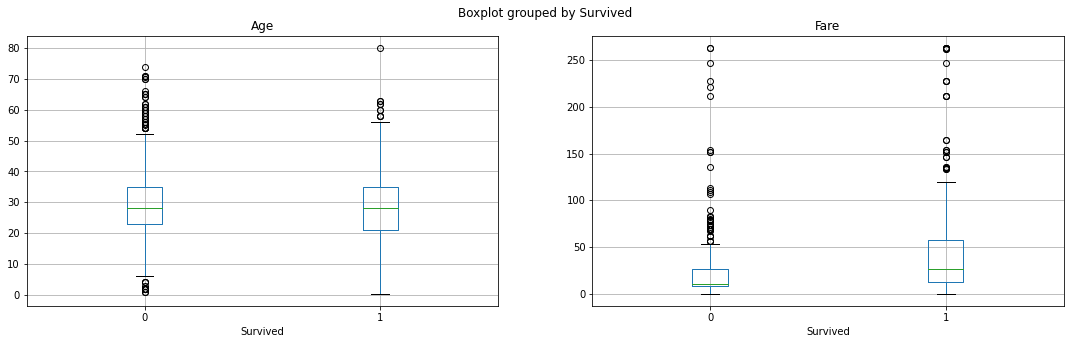

In [22]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Age','Fare']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    TitanicSurvivalData.boxplot(column=PredictorCol, by='Survived', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "Age" Vs "Survived". The boxes are in the same line! It means that people who have survived the crash and those who did not survive the crash have similar kind of ages. Hence, I cannot distinguish between survival and non-survival effectively based on the Age. So this column is NOT correlated with the Survived.

The other chart exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of survival. It hints that these variables might be correlated with Survived.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [23]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [24]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age','Fare']
FunctionAnova(inpData=TitanicSurvivalData, TargetVariable='Survived', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is NOT correlated with Survived | P-Value: 0.052760688475835
Fare is correlated with Survived | P-Value: 1.8421954983111479e-16


['Fare']

The results of ANOVA confirm our visual analysis using box plots above.

Look at the P-Value of Age, it got rejected by a little margin!! In such scenarios you may decide to include this variable which is at the boundry line and see if it helps to increase the accuracy.

<b>Final selected Continuous columns:</b>

'Fare'

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [25]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TitanicSurvivalData['Sex'], columns=TitanicSurvivalData['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


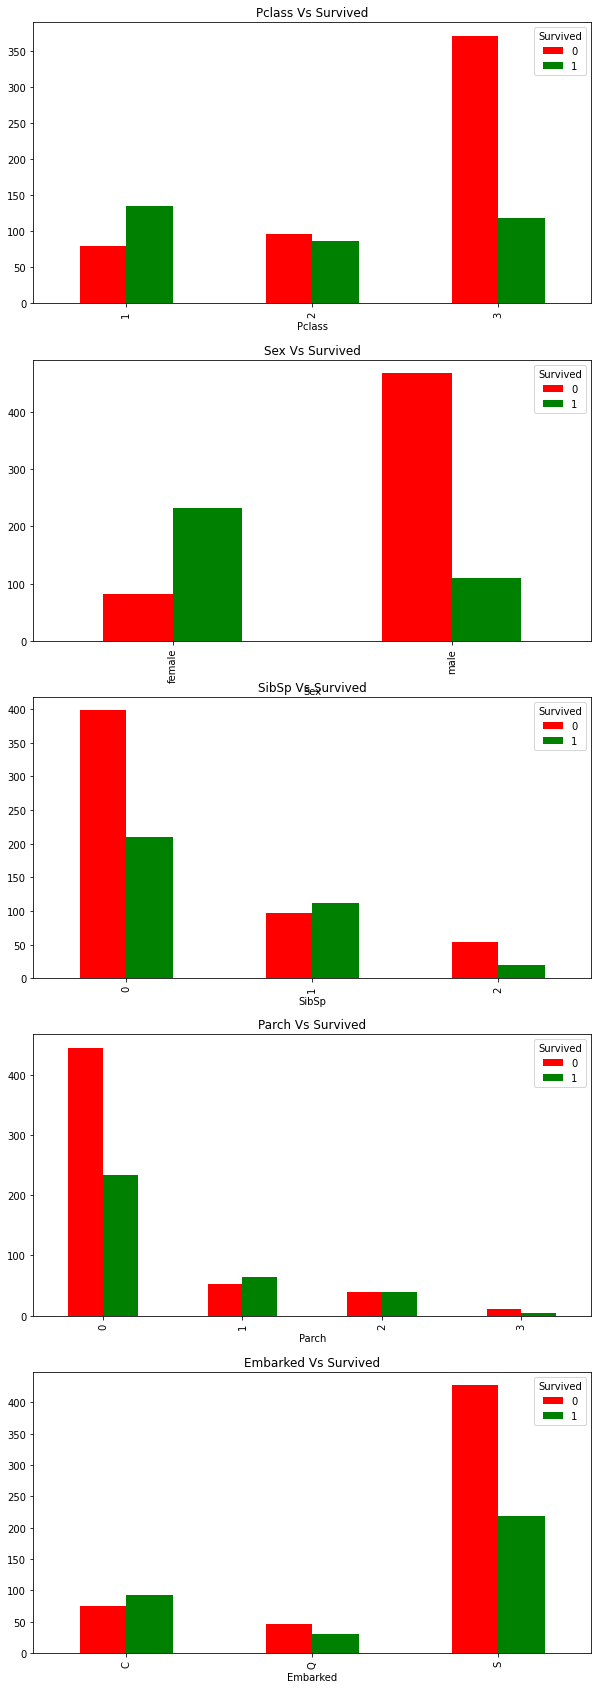

In [26]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=TitanicSurvivalData[CategoricalCol], columns=TitanicSurvivalData['Survived'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Survived')

# Grouped Bar charts Interpretation
<b>What to look for in these grouped bar charts?</b>

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated. 

On the other hand, look at the Sex vs Survived plot. The bars are different for each category, Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [27]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [28]:
CategoricalVariables=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

# Calling the function
FunctionChisq(inpData=TitanicSurvivalData, 
              TargetVariable='Survived',
              CategoricalVariablesList= CategoricalVariables)

Pclass is correlated with Survived | P-Value: 4.549251711298793e-23
Sex is correlated with Survived | P-Value: 1.1973570627755645e-58
SibSp is correlated with Survived | P-Value: 7.28560209980573e-07
Parch is correlated with Survived | P-Value: 2.5227955142443396e-05
Embarked is correlated with Survived | P-Value: 2.3008626481449577e-06


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

<b>Finally selected Categorical variables:</b>

'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [29]:
SelectedColumns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked','Fare']

# Selecting final columns
DataForML=TitanicSurvivalData[SelectedColumns]
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500


In [30]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.

## Converting the binary nominal variable to numeric using 1/0 mapping

In [31]:
# Converting the binary nominal variable sex to numeric
DataForML['Sex'].replace({'female':0, 'male':1}, inplace=True)

In [32]:
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,1,1,0,S,7.2500
1,1,0,1,0,C,71.2833
2,3,0,0,0,S,7.9250
3,1,0,1,0,S,53.1000
4,3,1,0,0,S,8.0500


## Converting the nominal variable to numeric using get_dummies()

In [33]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Survived']=TitanicSurvivalData['Survived']

# Printing sample rows
DataForML_Numeric.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [34]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

In [35]:
# Separate Target Variable and Predictor Variables
TargetVariable='Survived'
# Predictors=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']
Predictors=['Pclass','Sex','Fare']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [36]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 3)
(623,)
(268, 3)
(268,)


# Logistic Regression

In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

[[134  33]
 [ 23  78]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.8        0.79775281 0.75981111 0.84348731 0.78803431 0.77021909
 0.75981111 0.73447598 0.80556137 0.76195095]

Final Average Accuracy of the model: 0.78


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[141  16]
 [ 35  76]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.80938963 0.81776069 0.76791722 0.83190886 0.82022472 0.79319719
 0.7911255  0.77562138 0.82683216 0.79359477]

Final Average Accuracy of the model: 0.8


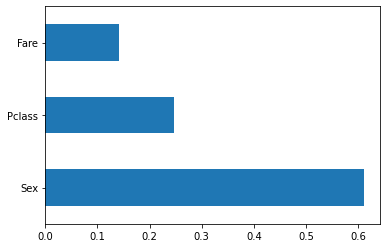

In [39]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [40]:
# Installing the required library for plotting the decision tree
# !pip install dtreeplt

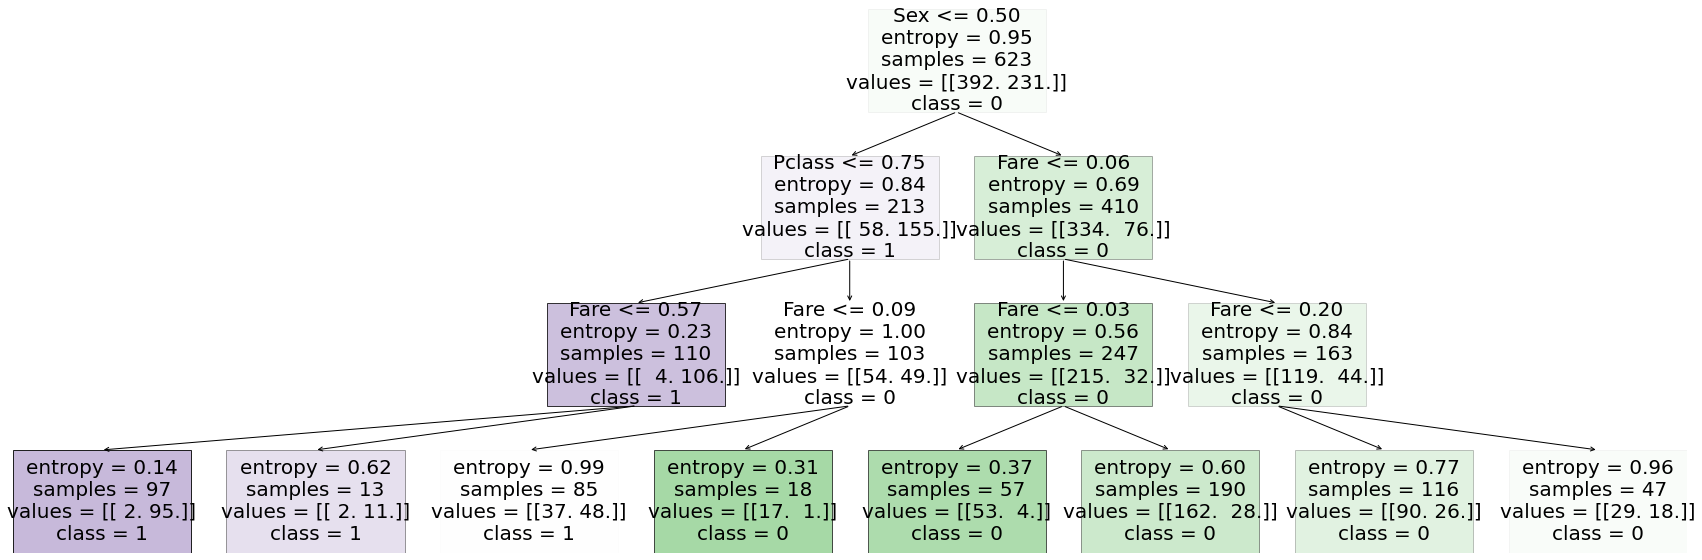

In [41]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=['0','1'])
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)
# Double click on the graph to zoom in

### Individual Predictors

In [42]:
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,1,1,0,S,7.2500
1,1,0,1,0,C,71.2833
2,3,0,0,0,S,7.9250
3,1,0,1,0,S,53.1000
4,3,1,0,0,S,8.0500


In [43]:
# Creating some new data rows
NewData=pd.DataFrame(data=[[3,1,7.25],
                           [1,0,71.2833],
                           [2,0,121]], columns=Predictors)
NewData


,Pclass,Sex,Fare
0,3,1,7.2500
1,1,0,71.2833
2,2,0,121.0000


In [44]:
def preprocess_predict(NewData):
    newX=NewData.values
    newX=MinMaxScaler().fit_transform(newX)
    NewData['prediction']=DTree.predict(newX)
    return NewData

In [45]:
preprocess_predict(NewData)

,Pclass,Sex,Fare,prediction
0,3,1,7.2500,0
1,1,0,71.2833,1
2,2,0,121.0000,1


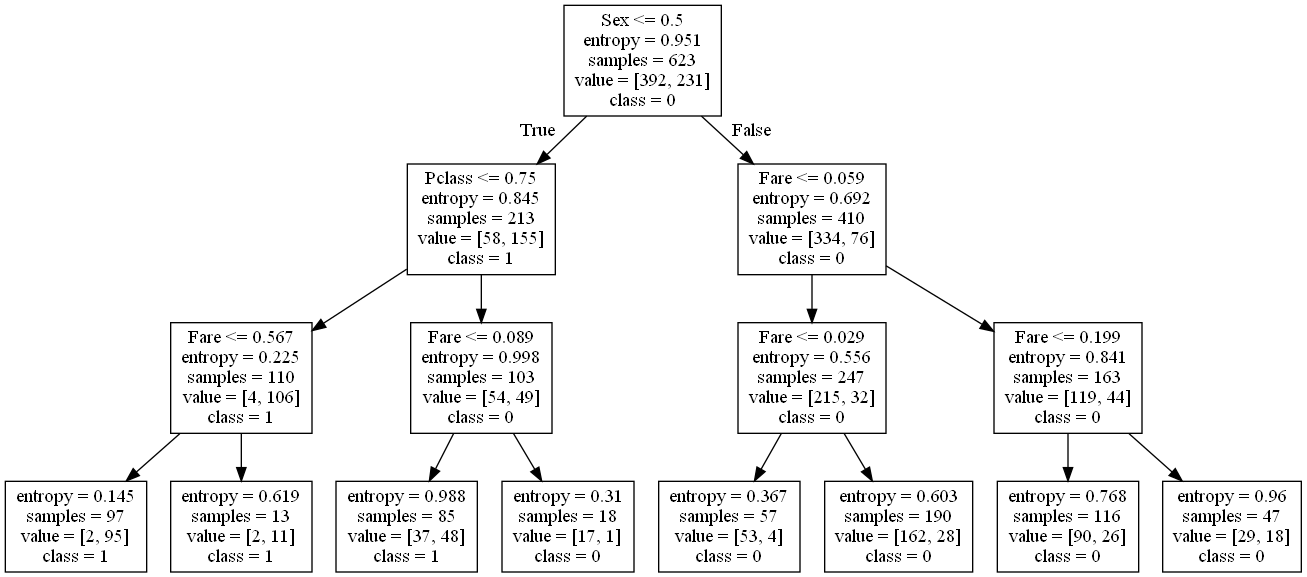

In [46]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DTree, out_file=None, 
                                feature_names=Predictors, class_names=['0','1'])
# printing the rules
# print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1500,height=1500)
# Double click on the graph to zoom in


### Random Forest

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268

[[143  14]
 [ 38  73]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.75827708 0.77220087 0.76791722 0.85350049 0.86332052 0.79924018
 0.80164322 0.77256866 0.83754206 0.75571362]

Final Average Accuracy of the model: 0.8


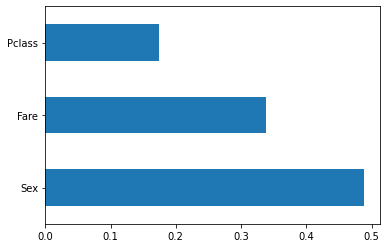

In [56]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=100,max_depth=4,criterion='entropy')

RFC.fit(X_train,y_train)

predRFC=RFC.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, predRFC))
print(metrics.confusion_matrix(y_test, predRFC))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, predRFC, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RFC.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn

from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RFC, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


### AdaBoost

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.67      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[143  14]
 [ 37  74]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.79884454 0.79319719 0.75497104 0.85497084 0.84269663 0.80556137
 0.81433378 0.78874467 0.84171774 0.77248407]

Final Average Accuracy of the model: 0.81


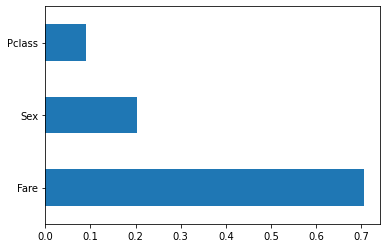

In [66]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# DS=DecisionTreeClassifier(max_depth=4,criterion='entropy')

ADA=AdaBoostClassifier(base_estimator=DTree,n_estimators=100,learning_rate=0.05)

ADA.fit(X_train,y_train)

predADA=ADA.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, predADA))
print(metrics.confusion_matrix(y_test, predADA))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, predADA, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(ADA.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(ADA, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### XGBoost

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.70      0.76       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

F1 score for the fitted Model is : 0.8107
[0.80938963 0.79319719 0.76791722 0.82112835 0.8309621  0.78065407
 0.7911255  0.77562138 0.83754206 0.79359477]
Final Mean Accuracy of Model is :  0.8001


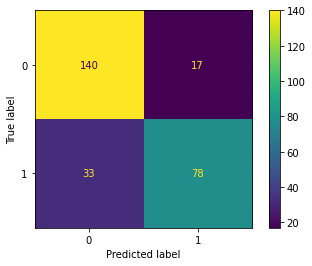

In [86]:
from xgboost import XGBClassifier

XGB=XGBClassifier(max_depth=3,n_estimators=100,objective='binary:logistic',learning_rate=0.01,booster='gbtree',eval_metric='logloss')
XGB.fit(X_train,y_train)

predXGB=XGB.predict(X_test)

print(metrics.classification_report(y_test,predXGB))
print("F1 score for the fitted Model is :",round(metrics.f1_score(y_test,predXGB,average='weighted'),4))

# ---------------------------------------------------------------

print(metrics.plot_confusion_matrix(XGB,X_test,y_test))

cv=cross_val_score(XGB,X,y,cv=10,scoring='f1_weighted')

print(cv)
print("Final Mean Accuracy of Model is : ",round(np.mean(cv),4))
